## Exploratory Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Initial looks at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(percentiles=None, include = 'all', exclude = None)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# lots of null values for Cabin, but most are unique values and that's also a value that won't generalize to 
# modern disasters, so let's drop the column. 
# Let's also delete PassengerId, because this is a unique identifier and won't be used in modeling.
# Finally, let's delete 'ticket' because with 681 unique string values, this isn't going to be useful for modeling.
del df["Cabin"]
del df["PassengerId"]
del df['Ticket']

In [7]:
# drop the rows with N/A values for Age or Embarked
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


## Visualizations

0    0.595506
1    0.404494
Name: Survived, dtype: float64


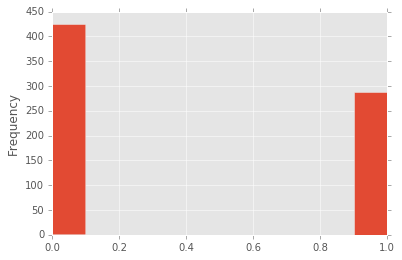

In [9]:
# histogram of survival and % of passengers who survived
print df.Survived.value_counts()/df.Survived.count()
df.Survived.plot(kind='hist')

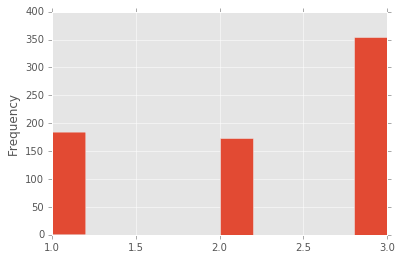

In [10]:
# histogram of fare class
df.Pclass.plot(kind='hist')

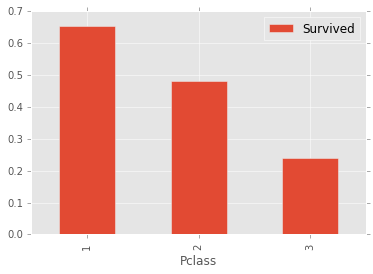

In [11]:
# look at survival rates by class
df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')

In [12]:
# look at number of passengers per port of embarkation
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

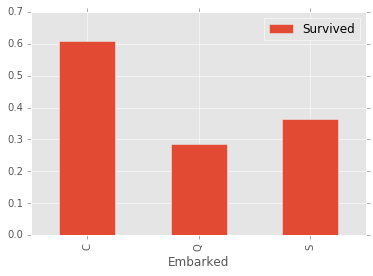

In [13]:
# look at survival rates by port of embarkation
df[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar')

Standard Deviation: 
             Fare
Pclass           
1       81.293524
2       13.187429
3       10.043158
Mean: 
             Fare
Pclass           
1       88.048121
2       21.471556
3       13.229435


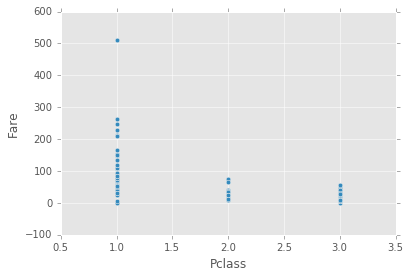

In [16]:
# Passenger class and fare might be correlated. Look at a plot as well as mean, std of fare by class

df.plot(kind='scatter', x = 'Pclass', y= 'Fare')

print 'Standard Deviation: \n', df[['Fare', 'Pclass']].groupby('Pclass').std()
print 'Mean: \n', df[['Fare', 'Pclass']].groupby('Pclass').mean()

In [17]:
# look at correlation between numerical features to see if we should exclude any:
print df.corr()
# correlation is indeed high (-.55) between Fare and Pclass. We'll exclude Fare from our model.

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100
Pclass   -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age      -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp    -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860
Parch     0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624
Fare      0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000


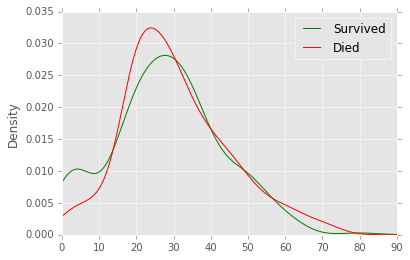

In [18]:
# look at density plot of Age among those who survived and those who did not.
# this shows a higher relative survival rate among children (younger than 13 or so) and
# lower relative survival rate among young adult passengers (between roughly 15 and 30).

survived = df['Survived']==1
df[survived].Age.plot(kind='kde', color='g')
df[~survived].Age.plot(kind='kde', color='r')
plt.xlim(0,90)
plt.legend(['Survived', 'Died'])

## Data Wrangling

In [19]:
# create df of dummies for 'Sex' and 'Embarked'
dummies = pd.get_dummies(df[['Sex', 'Embarked']])
dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [20]:
# remove old 'Sex', 'Embarked' columns and append new dummy columns, dropping 1 of each
df1 = pd.concat([df, dummies], axis=1).drop(['Sex', 'Embarked', 'Sex_male', 'Embarked_C'], axis =1)
df1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0.0,0.0,1.0


## Logistic Regression and Model Validation

In [21]:
# define features and X, y variables
features = df1.columns.drop(['Survived','Name', 'Fare'])
X = df1[features]
y = df1['Survived']

In [22]:
# select 3 best features using SelectKBest
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(k=3)
print kbest.fit_transform(X,y)
print kbest.get_support()
print kbest.pvalues_

[[ 3.  0.  1.]
 [ 1.  1.  0.]
 [ 3.  1.  1.]
 ..., 
 [ 1.  1.  1.]
 [ 1.  0.  0.]
 [ 3.  0.  0.]]
[ True False False False  True False  True]
[  9.30361974e-23   2.78203163e-02   6.79238072e-01   1.09806124e-02
   2.24285164e-54   1.91870525e-01   2.01920303e-05]


In [23]:
# make a reduced dataframe with just the 3 best features
X1 = X[[col for (col, include) in zip(X.columns, kbest.get_support()) if include==True]]
X1.head()

,Pclass,Sex_female,Embarked_S
0,3,0.0,1.0
1,1,1.0,0.0
2,3,1.0,1.0
3,1,1.0,1.0
4,3,0.0,1.0


In [24]:
# run logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=5)
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# make a function to return a dataframe with coefficients in case we need it again
def coefDF(X, model):
    modelCoefs = pd.DataFrame()
    modelCoefs['Feature'] = X.columns
    modelCoefs['Coef'] = model.coef_.tolist()[0]
    return modelCoefs

# print coefficients of different features
print coefDF(X, lg)

      Feature      Coef
0      Pclass -1.092143
1         Age -0.035153
2       SibSp -0.301547
3       Parch -0.023530
4  Sex_female  2.496799
5  Embarked_Q -0.562460
6  Embarked_S -0.304334


In [26]:
# repeat with X1 (our best 3 features only)
lg1 = LogisticRegression(random_state=5)
lg1.fit(X1, y)
print coefDF(X1, lg1)

      Feature      Coef
0      Pclass -0.908702
1  Sex_female  2.453072
2  Embarked_S -0.342153


In [27]:
# use train test split to assess models
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                    test_size = .2, random_state=5, stratify = y)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, \
                    test_size = .2, random_state=5, stratify = y)

lg.fit(X_train, y_train)
lg1.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate Models

In [29]:
# print mean accuracy score
print lg.score(X_test, y_test)
print lg1.score(X1_test, y1_test)
# as expected, the model with less features is less accurate - however,
# it loses less than .05 accuracy from dropping 4 of 7 features - in this 
# respect, it is still quite a good model

0.811188811189
0.762237762238


In [31]:
# print cvscores and mean score
cvscores = cross_val_score(lg, X_test, y_test)
cvscores1 = cross_val_score(lg1, X1_test, y1_test)
print cvscores
print np.mean(cvscores)
print cvscores1
print np.mean(cvscores1)

# with cvscores, the difference between our models practically totally drops away

[ 0.73469388  0.68085106  0.82978723]
0.748444058474
[ 0.71428571  0.70212766  0.80851064]
0.741641337386


In [30]:
# import metrics we'll need
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# get class predictions and prediction probabilities for test sets
y_pred = lg.predict(X_test)
y1_pred = lg1.predict(X1_test)

y_proba = lg.predict_proba(X_test)
y1_proba = lg1.predict_proba(X1_test)

In [31]:
# print classification reports
print classification_report(y_test,y_pred)
print classification_report(y1_test, y1_pred)

             precision    recall  f1-score   support

          0       0.80      0.92      0.85        85
          1       0.84      0.66      0.74        58

avg / total       0.82      0.81      0.81       143

             precision    recall  f1-score   support

          0       0.77      0.85      0.81        85
          1       0.74      0.64      0.69        58

avg / total       0.76      0.76      0.76       143



In [32]:
# print confusion matrices
print confusion_matrix(y_test, y_pred)
print confusion_matrix(y1_test, y1_pred)

[[78  7]
 [20 38]]
[[72 13]
 [21 37]]


In [33]:
# make a function to plot ROC curve
def plotROC(y_list, plotTitle):
    leg = []
    for y_test, y_proba, col, name in y_list:
        fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
        plt.plot(fpr, tpr, color = col)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        leg.append(name)
    leg.append("Guessing")
    plt.plot([0,1],[0,1])
    plt.title(plotTitle)
    plt.legend(leg, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-.1,1.1)
    plt.ylim(-.1,1.1)
    plt.show()

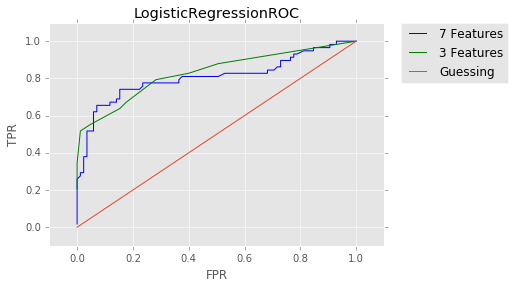

In [34]:
# make plot
plotROC([[y_test, y_proba, 'b', "7 Features"],[y1_test, y1_proba, 'g', "3 Features"]],"LogisticRegressionROC")

The ROC curve shows us that our logistic regression classifier is reasonably good: it curves well away from the baseline line of y=x (ie guessing). 

Additionally, this helps us to see the difference between our 7-feature and 3-feature models: the 3-feature model has a much smoother ROC curve. Let's use just our top 3 features going forward.

## Use GridsearchCV to improve results

In [35]:
param_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

In [36]:
from sklearn.grid_search import GridSearchCV

#instantiate gridsearch with our 3-feature model as base
gslg = GridSearchCV(lg1, param_grid, n_jobs = -1, cv=5)

In [37]:
# fit gridsearch
gslg.fit(X1,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
# look at results
print gslg.best_estimator_
print coefDF(X1, gslg.best_estimator_)
print "Score: ", gslg.best_score_

LogisticRegression(C=0.015264179671752334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=5,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
      Feature      Coef
0      Pclass -0.397373
1  Sex_female  0.863878
2  Embarked_S -0.078750
Score:  0.790730337079


#### Our vanilla logistic regression with 3 features had a score of .762, so this estimator is better

In [39]:
# predict y using gslg, feed into confusion matrix
gslg_pred = gslg.predict(X1)
print confusion_matrix(y, gslg_pred)
print classification_report(y, gslg_pred)

[[415   9]
 [140 148]]
             precision    recall  f1-score   support

          0       0.75      0.98      0.85       424
          1       0.94      0.51      0.67       288

avg / total       0.83      0.79      0.77       712



## Gridsearch for optimal kNN model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate model
knn = KNeighborsClassifier(n_jobs=-1)

# set param_grid
param_grid = {
    'n_neighbors': range(1,50),
    'weights': ['uniform', 'distance']
}

# instantiate gridsearch
gsknn = GridSearchCV(knn, param_grid, cv = 5)

In [41]:
# fit model
gsknn.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [42]:
# repeat for X1, our 3-feature set
knn1 = KNeighborsClassifier(n_jobs=-1)
gsknn1 = GridSearchCV(knn1, param_grid, cv = 5)
gsknn1.fit(X1,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [51]:
# print best estimator and score
print gsknn.best_estimator_
print "Score: ", gsknn.best_score_
print gsknn1.best_estimator_
print "Score: ", gsknn1.best_score_

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
           weights='uniform')
Score:  0.773876404494
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
           weights='uniform')
Score:  0.799157303371


The 7-feature knn model with n_neighbors = 9 and uniform weights (as optimized by GridSearchCV) does not perform quite as well as the best 3-feature gridsearchcv logistic regression estimator we found earlier (gslg score .79).

The 3-feature knn model with n_neighbors = 20 and uniform weights, however, slightly outperforms the logistic regression estimator.

In [43]:
# generate predictions and feed them into a confusion matrix
gsknn_pred=gsknn.predict(X)
print confusion_matrix(y, gsknn_pred)
print classification_report(y, gsknn_pred)
gsknn1_pred=gsknn1.predict(X1)
print confusion_matrix(y, gsknn1_pred)
print classification_report(y, gsknn1_pred)

[[384  40]
 [ 96 192]]
             precision    recall  f1-score   support

          0       0.80      0.91      0.85       424
          1       0.83      0.67      0.74       288

avg / total       0.81      0.81      0.80       712

[[405  19]
 [124 164]]
             precision    recall  f1-score   support

          0       0.77      0.96      0.85       424
          1       0.90      0.57      0.70       288

avg / total       0.82      0.80      0.79       712



The confusion matrix for our gridsearched logistic regression model (3 features) was:
[[415   9]
 [140 148]]
 
The main difference we can identify here is that the Logistic Regression model has a much higher ratio of false negatives to false positives (and a higher false negative rate / lower false positive rate in absolute terms as well). Between the 3 models, Logistic 3 Features has the best specificity, while the kNN 7 features model has the best sensitivity and the best overall accuracy.

#### Look at the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot

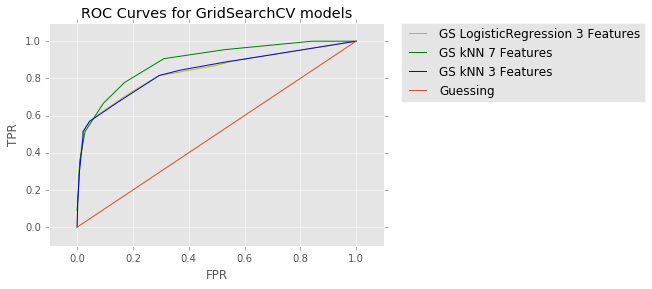

In [45]:
gslg_proba = gslg.predict_proba(X1)
gsknn_proba = gsknn.predict_proba(X)
gsknn1_proba = gsknn1.predict_proba(X1)
# ytest, yproba, color, name
predictors = [[y, gslg_proba, 'y', "GS LogisticRegression 3 Features"],
             [y, gsknn_proba, 'g', "GS kNN 7 Features"],
             [y, gsknn1_proba, 'b', "GS kNN 3 Features"]]
plotROC(predictors, "ROC Curves for GridSearchCV models")

## Try optimizing model for precision instead of accuracy

In [46]:
# create param grid and gridsearch
# note: since this is just for comparison, I'm using only the 3-feature model
param_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

precGS = GridSearchCV(lg1, param_grid, n_jobs = -1, cv=5, scoring = 'average_precision')

In [47]:
# fit GS
precGS.fit(X1,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring='average_precision',
       verbose=0)

In [48]:
# look at performance of model
print precGS.best_estimator_
print coefDF(X1, precGS.best_estimator_)
print "Score: ", precGS.best_score_

LogisticRegression(C=0.035564803062231282, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=5,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
      Feature      Coef
0      Pclass -0.528246
1  Sex_female  1.343807
2  Embarked_S -0.117320
Score:  0.831160781291


Result from earlier gridsearch logistic regression: 


LogisticRegression(C=0.015264179671752334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=5,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
      Feature      Coef
0      Pclass -0.397373
1  Sex_female  0.863878
2  Embarked_S -0.078750
Score:  0.790730337079

### Differences
The differences between the models are minor: with scoring set to precision, gridsearch selected a slightly higher C value (less strong penalization of coefficients). The coefficients therefore are all greater in the precision model.

In [49]:
# look at confusion matrix and classification report for precision vs accuracy
precGS_pred = precGS.predict(X1)
print "precision optimized: \n", confusion_matrix(y, precGS_pred)
print classification_report(y, precGS_pred)
print "accuracy optimized: \n", confusion_matrix(y, gslg_pred)
print classification_report(y, gslg_pred)

precision optimized: 
[[405  19]
 [124 164]]
             precision    recall  f1-score   support

          0       0.77      0.96      0.85       424
          1       0.90      0.57      0.70       288

avg / total       0.82      0.80      0.79       712

accuracy optimized: 
[[415   9]
 [140 148]]
             precision    recall  f1-score   support

          0       0.75      0.98      0.85       424
          1       0.94      0.51      0.67       288

avg / total       0.83      0.79      0.77       712



Our model optimized for precision has more false positives, but fewer false negatives, than the model optimized for accuracy. Precision is the ratio of true positives to all predicted positives, while accuracy is the ratio of correct predictions to total samples.

The difference in confusion matrices and classification report is therefore surprising: we should expect the precision to be higher with precision optimization, but it is in fact lower. 